# Item 1: Know Which Version of Python You're Using

In [15]:
import sys
print(sys.version_info)
print(sys.version)

sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


# Item 2: Follow the PEP 8 Style Guide

1. Whitespace
    - Funtions and classes should be separated by two blank lines.
    - In a class, methos should be separated by one blank line.
1. Naming
    - Protected instance attributes should be in `_leading_underscore` format.
    - Private instance attributes should be in `__double_leading_underscore` format.
    - Module-level constants should be in `ALL_CAPS` format.
1. Expression and Statements
    - Avoid single-line `if` statements, `for` and `while` loops, and `except` compund statements. Separate these over multiple lines for clarity.
    - If you can't fit an expression on one line, surround it with parentheses and add line breaks and indentaition to make it easier to read.
    - Prefer surrounding multiline expression with parentheses over using `\` line continuation character.
1. Imports

In [16]:
def foo():
    ls = [[1, 2], [], [1, 2, 3]]
    for l in ls:
        if (not l or
            len(l) > 2): continue
        print(l)

foo()

[1, 2]


bar
  |-> foo.py
  |-> me.py

#me.py

import foo          # relative import
from . import foo   # relative import

from bar import foo # absolute path

# Item 3: Know the Differences Between bytes and str 
Two representation of character sequences data
1. `bytes`: contains raw, unsigned 8-bit values.
1. `str`: contains *Unicode code points*, represent textual characters from human languages

Notes
- *UFT-8* is commonly used encoding

`bytes`

In [38]:
def _type(a):
    print(f'`{a}` is of type `{type(a)}`')

In [39]:
# bytes representation
a = b'h\x65llo'
print(list(a))
_type(a)

[104, 101, 108, 108, 111]
`b'hello'` is of type `<class 'bytes'>`


In [40]:
# convert bytes to str
a.decode('utf-8')
_type(a)

`b'hello'` is of type `<class 'bytes'>`


`str`

In [41]:
# str representation
a = 'a\u0300 propos'
print(list(a))
_type(a)

['a', '̀', ' ', 'p', 'r', 'o', 'p', 'o', 's']
`à propos` is of type `<class 'str'>`


In [42]:
# convert str to bytes
a = a.encode('utf-8')
_type(a)

`b'a\xcc\x80 propos'` is of type `<class 'bytes'>`


#### Two common situation in python code when dealing with character types
1. We want to operate on raw 8-bit sequences that contains UTF-8-encoded strings (or some other encoding)
1. We want to opetate on Unicode strings that have no specific encoding (must be UFT-8)

### UTF-8
A in ascii 01100001 in UTF-8 **110**00001 **10**100001 -> 00001 100001, `110` tells there 2 bytes, similarly `1110` tells there are 
three bytes to represent the the character. `10` mean continuation of byte. Remaining bits are filled with bits to represent the character. 

For eg: if ཀ -> 00000000 00000000 00010011 00101101 in 32-bits. UTF-8 representation is **1110**00001 **10**001100 **10**101101

Helper functions to convert between above two cases and to ensure that the type of input is what our code expects.

### Find Unicode index of ཀ

In [79]:
'ཀ'.encode('utf-8')

b'\xe0\xbd\x80'

In [80]:
" ".join(f"{i:08b}" for i in (0xe0, 0xbd, 0x80))

'11100000 10111101 10000000'

Extract character bits from UTF-8 bits:

Steps
1. Seperate UTF-8 hack codes into bold, **1110**0000 **10**111101 **10**000000
2. Extract all the non-bold bits, 0000 111101 000000
3. Concatenate the bits, 0000111101000000



In [83]:
int('0000111101000000', 2)

3904

Check for index from Unicode Table

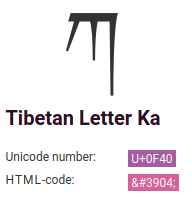

In [86]:
from IPython.display import Image
Image(filename='assets/imgs/ka.png') 

In [58]:
def to_str(bytes_or_str):
    if isinstance(bytes_or_str, bytes):
        value = bytes_or_str.decode('utf-8')
    else:
        value = bytes_or_str
    return value # always str instance

_type(to_str(b'foo'))
_type(to_str('bar'))

`foo` is of type `<class 'str'>`
`bar` is of type `<class 'str'>`


In [64]:
def to_bytes(bytes_or_str):
    if isinstance(bytes_or_str, str):
        value = bytes_or_str.encode('utf-8')
    else:
        value = bytes_or_str
    return value # always byte instance

_type(to_bytes(b'foo'))
_type(to_bytes('bar'))

`b'foo'` is of type `<class 'bytes'>`
`b'bar'` is of type `<class 'bytes'>`
